In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS

In [3]:
# directory ="/Users/huiwen/Documents/Side\ Projects/Omdena/omdena-colombia-socialnetwork/Untitled/src/data/task-2-preprocessing/merged_data/Merged_twitter_en_topic_modelling.csv"
directory = "Merged_twitter_en_topic_modelling.csv"
tweet = pd.read_csv(directory)
tweet.head()

,Unnamed: 0,created_at,id_str,conversation_id_str,full_text,lang,favorited,retweeted,retweet_count,favorite_count,...,in_reply_to_user_id_str,hashtags,mentions,urls,media,preprocessed_created_at,preprocessed_data,emoji_list,emoticon_list,data_source
0,0,2021-04-23T07:14:36+00:00,1.385492e+18,1.385492e+18,📢Join the seminar aiming at supporting #1May #...,en,False,False,5,4,...,NaN,"#1May , #1maggio , #1Mayo","LeftHeinz , Yolanda_Diaz_ , VisentiniLuca , lu...",NaN,"[{""url"": ""https://pbs.twimg.com/media/EzpAFBfX...",2021-04-23,"['join', 'seminar', 'aim', 'support', 'may', '...",['📢'],[],Mayo_ENGLISH_tweets_stweet.csv
1,1,2021-04-22T04:12:43+00:00,1.385084e+18,1.384885e+18,@julioacosta1701 @DiazCanelB @AlejandroGilF @r...,es,False,False,7,1,...,1.194288e+18,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","julioacosta1701 , DiazCanelB , AlejandroGilF ,...",NaN,[],2021-04-22,"['caliente', 'tweetazo', 'prevenirporlavida', ...",[],[],Mayo_ENGLISH_tweets_stweet.csv
2,2,2021-04-22T04:12:00+00:00,1.385084e+18,1.384803e+18,@julioacosta1701 @AliRubioGlez @Vicente7397772...,es,False,False,7,1,...,1.194288e+18,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","julioacosta1701 , AliRubioGlez , Vicente739777...",NaN,[],2021-04-22,"['sumo', 'prevenirporlavida', 'patriaomuerte',...",[],[],Mayo_ENGLISH_tweets_stweet.csv
3,3,2021-04-22T04:09:48+00:00,1.385083e+18,1.384882e+18,@AdrinMartnezGo1 @julioacosta1701 @DiazCanelB ...,es,False,False,6,0,...,1.136331e+18,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","AdrinMartnezGo1 , julioacosta1701 , DiazCanelB...",NaN,[],2021-04-22,"['hay', 'diocancancan', 'prevenirporlavida', '...",['😅😂🤣🤣'],[],Mayo_ENGLISH_tweets_stweet.csv
4,4,2021-04-22T03:32:26+00:00,1.385074e+18,1.384941e+18,@VilmaPrez14 @Laura53538740 @Granma_Digital @D...,es,False,False,5,1,...,1.101197e+18,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","VilmaPrez14 , Laura53538740 , Granma_Digital ,...",NaN,[],2021-04-22,"['con', 'mucha', 'conciencia', 'prevenirporlav...",[],[],Mayo_ENGLISH_tweets_stweet.csv


## 1. Top Words

<AxesSubplot:>

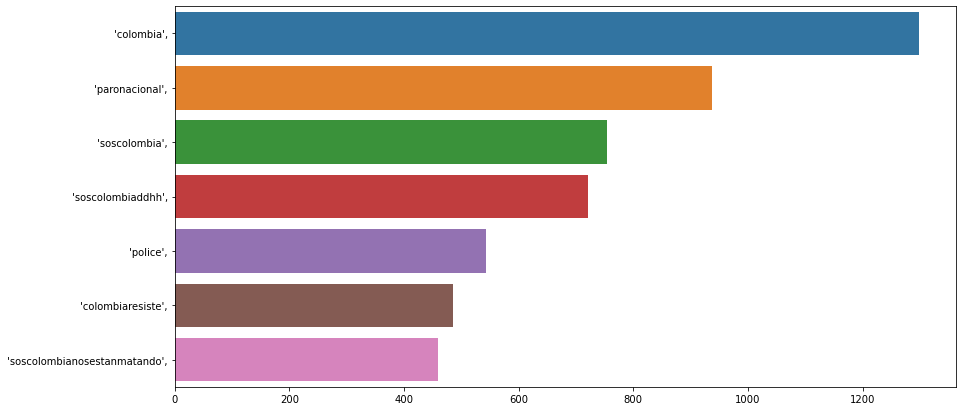

In [4]:
plt.figure(figsize = (14,7))
words = tweet[tweet["preprocessed_data"] != ""]
words = [word for xIndex, x in words.iterrows() for word in x["preprocessed_data"].split()]
# print(words)
counter = Counter(words)
x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x = y,y = x)

## 2. n-gram

In [5]:
# processed list of words to str
tweet['preprocessed_str'] = tweet['preprocessed_data'].apply(eval).apply(' '.join)
tweet.head()

,Unnamed: 0,created_at,id_str,conversation_id_str,full_text,lang,favorited,retweeted,retweet_count,favorite_count,...,hashtags,mentions,urls,media,preprocessed_created_at,preprocessed_data,emoji_list,emoticon_list,data_source,preprocessed_str
0,0,2021-04-23T07:14:36+00:00,1.385492e+18,1.385492e+18,📢Join the seminar aiming at supporting #1May #...,en,False,False,5,4,...,"#1May , #1maggio , #1Mayo","LeftHeinz , Yolanda_Diaz_ , VisentiniLuca , lu...",NaN,"[{""url"": ""https://pbs.twimg.com/media/EzpAFBfX...",2021-04-23,"['join', 'seminar', 'aim', 'support', 'may', '...",['📢'],[],Mayo_ENGLISH_tweets_stweet.csv,join seminar aim support may maggio mayo trade...
1,1,2021-04-22T04:12:43+00:00,1.385084e+18,1.384885e+18,@julioacosta1701 @DiazCanelB @AlejandroGilF @r...,es,False,False,7,1,...,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","julioacosta1701 , DiazCanelB , AlejandroGilF ,...",NaN,[],2021-04-22,"['caliente', 'tweetazo', 'prevenirporlavida', ...",[],[],Mayo_ENGLISH_tweets_stweet.csv,caliente tweetazo prevenirporlavida patriaomue...
2,2,2021-04-22T04:12:00+00:00,1.385084e+18,1.384803e+18,@julioacosta1701 @AliRubioGlez @Vicente7397772...,es,False,False,7,1,...,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","julioacosta1701 , AliRubioGlez , Vicente739777...",NaN,[],2021-04-22,"['sumo', 'prevenirporlavida', 'patriaomuerte',...",[],[],Mayo_ENGLISH_tweets_stweet.csv,sumo prevenirporlavida patriaomuerte unblockcu...
3,3,2021-04-22T04:09:48+00:00,1.385083e+18,1.384882e+18,@AdrinMartnezGo1 @julioacosta1701 @DiazCanelB ...,es,False,False,6,0,...,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","AdrinMartnezGo1 , julioacosta1701 , DiazCanelB...",NaN,[],2021-04-22,"['hay', 'diocancancan', 'prevenirporlavida', '...",['😅😂🤣🤣'],[],Mayo_ENGLISH_tweets_stweet.csv,hay diocancancan prevenirporlavida patriaomuer...
4,4,2021-04-22T03:32:26+00:00,1.385074e+18,1.384941e+18,@VilmaPrez14 @Laura53538740 @Granma_Digital @D...,es,False,False,5,1,...,"#PrevenirPorLaVida , #PatriaOMuerte , #UnBlock...","VilmaPrez14 , Laura53538740 , Granma_Digital ,...",NaN,[],2021-04-22,"['con', 'mucha', 'conciencia', 'prevenirporlav...",[],[],Mayo_ENGLISH_tweets_stweet.csv,con mucha conciencia prevenirporlavida patriao...


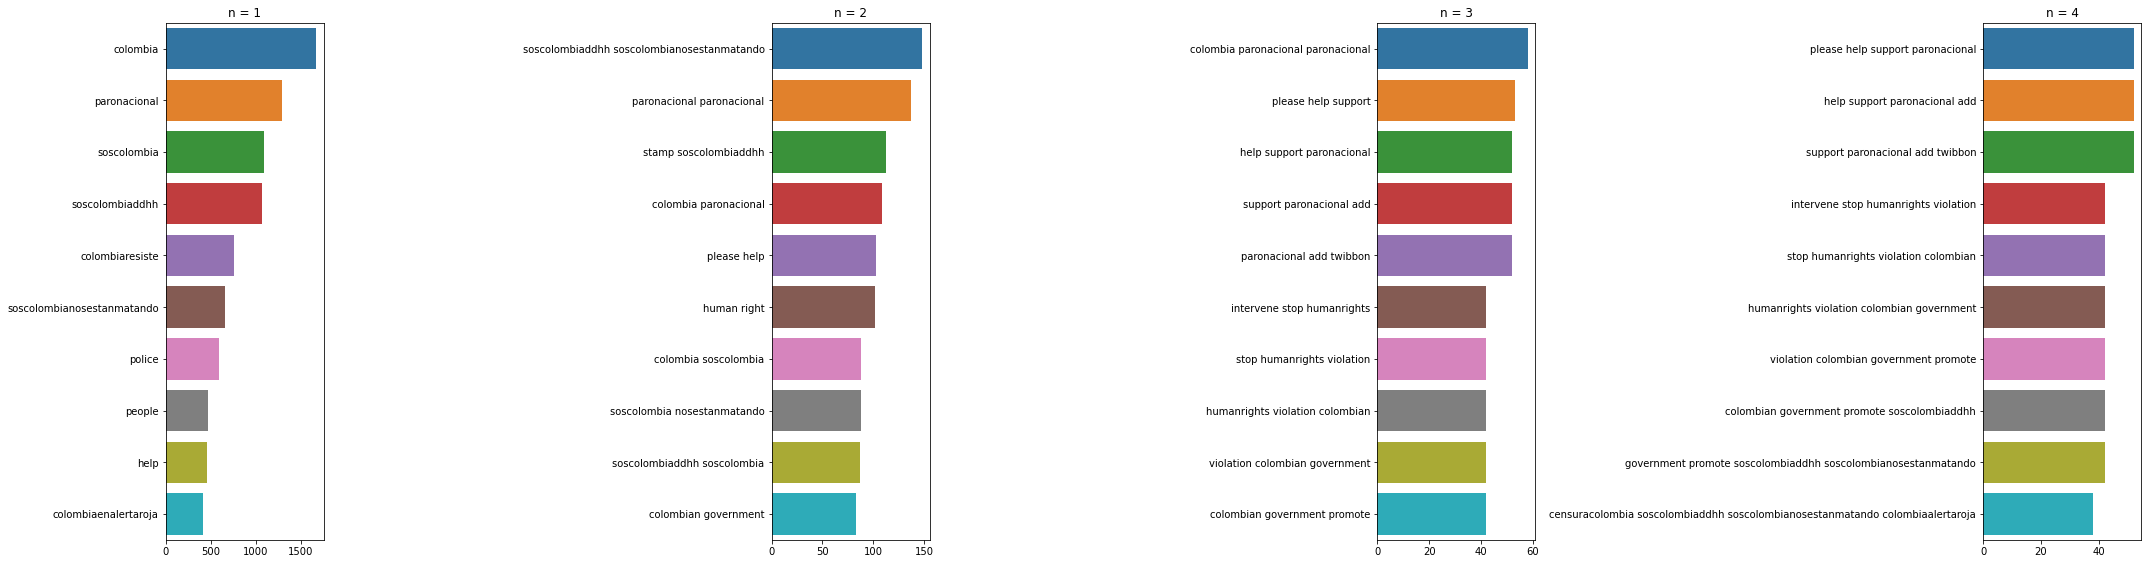

In [6]:
def get_top_ngram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:10]


fig, axs = plt.subplots(ncols = 4, figsize = (30, 8))
top_n_bigrams = get_top_ngram(tweet["preprocessed_str"], 1)
x,y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x = y, y = x, ax = axs[0])
top_n_bigrams = get_top_ngram(tweet["preprocessed_str"], 2)
x,y = map(list, zip(*top_n_bigrams)) 
sns.barplot(x = y, y = x, ax = axs[1])
top_tri_grams=get_top_ngram(tweet["preprocessed_str"], n = 3)
x,y = map(list, zip(*top_tri_grams))
sns.barplot(x = y, y = x, ax = axs[2])
top_quad_grams=get_top_ngram(tweet["preprocessed_str"], n = 4)
x,y = map(list, zip(*top_quad_grams))
sns.barplot(x = y, y = x, ax = axs[3])

axs[0].set_title("n = 1")
axs[1].set_title("n = 2")
axs[2].set_title("n = 3")
axs[3].set_title("n = 4")
fig.tight_layout(pad = 1.3)
# fig.savefig("ngram.png")

## 3. Word Cloud

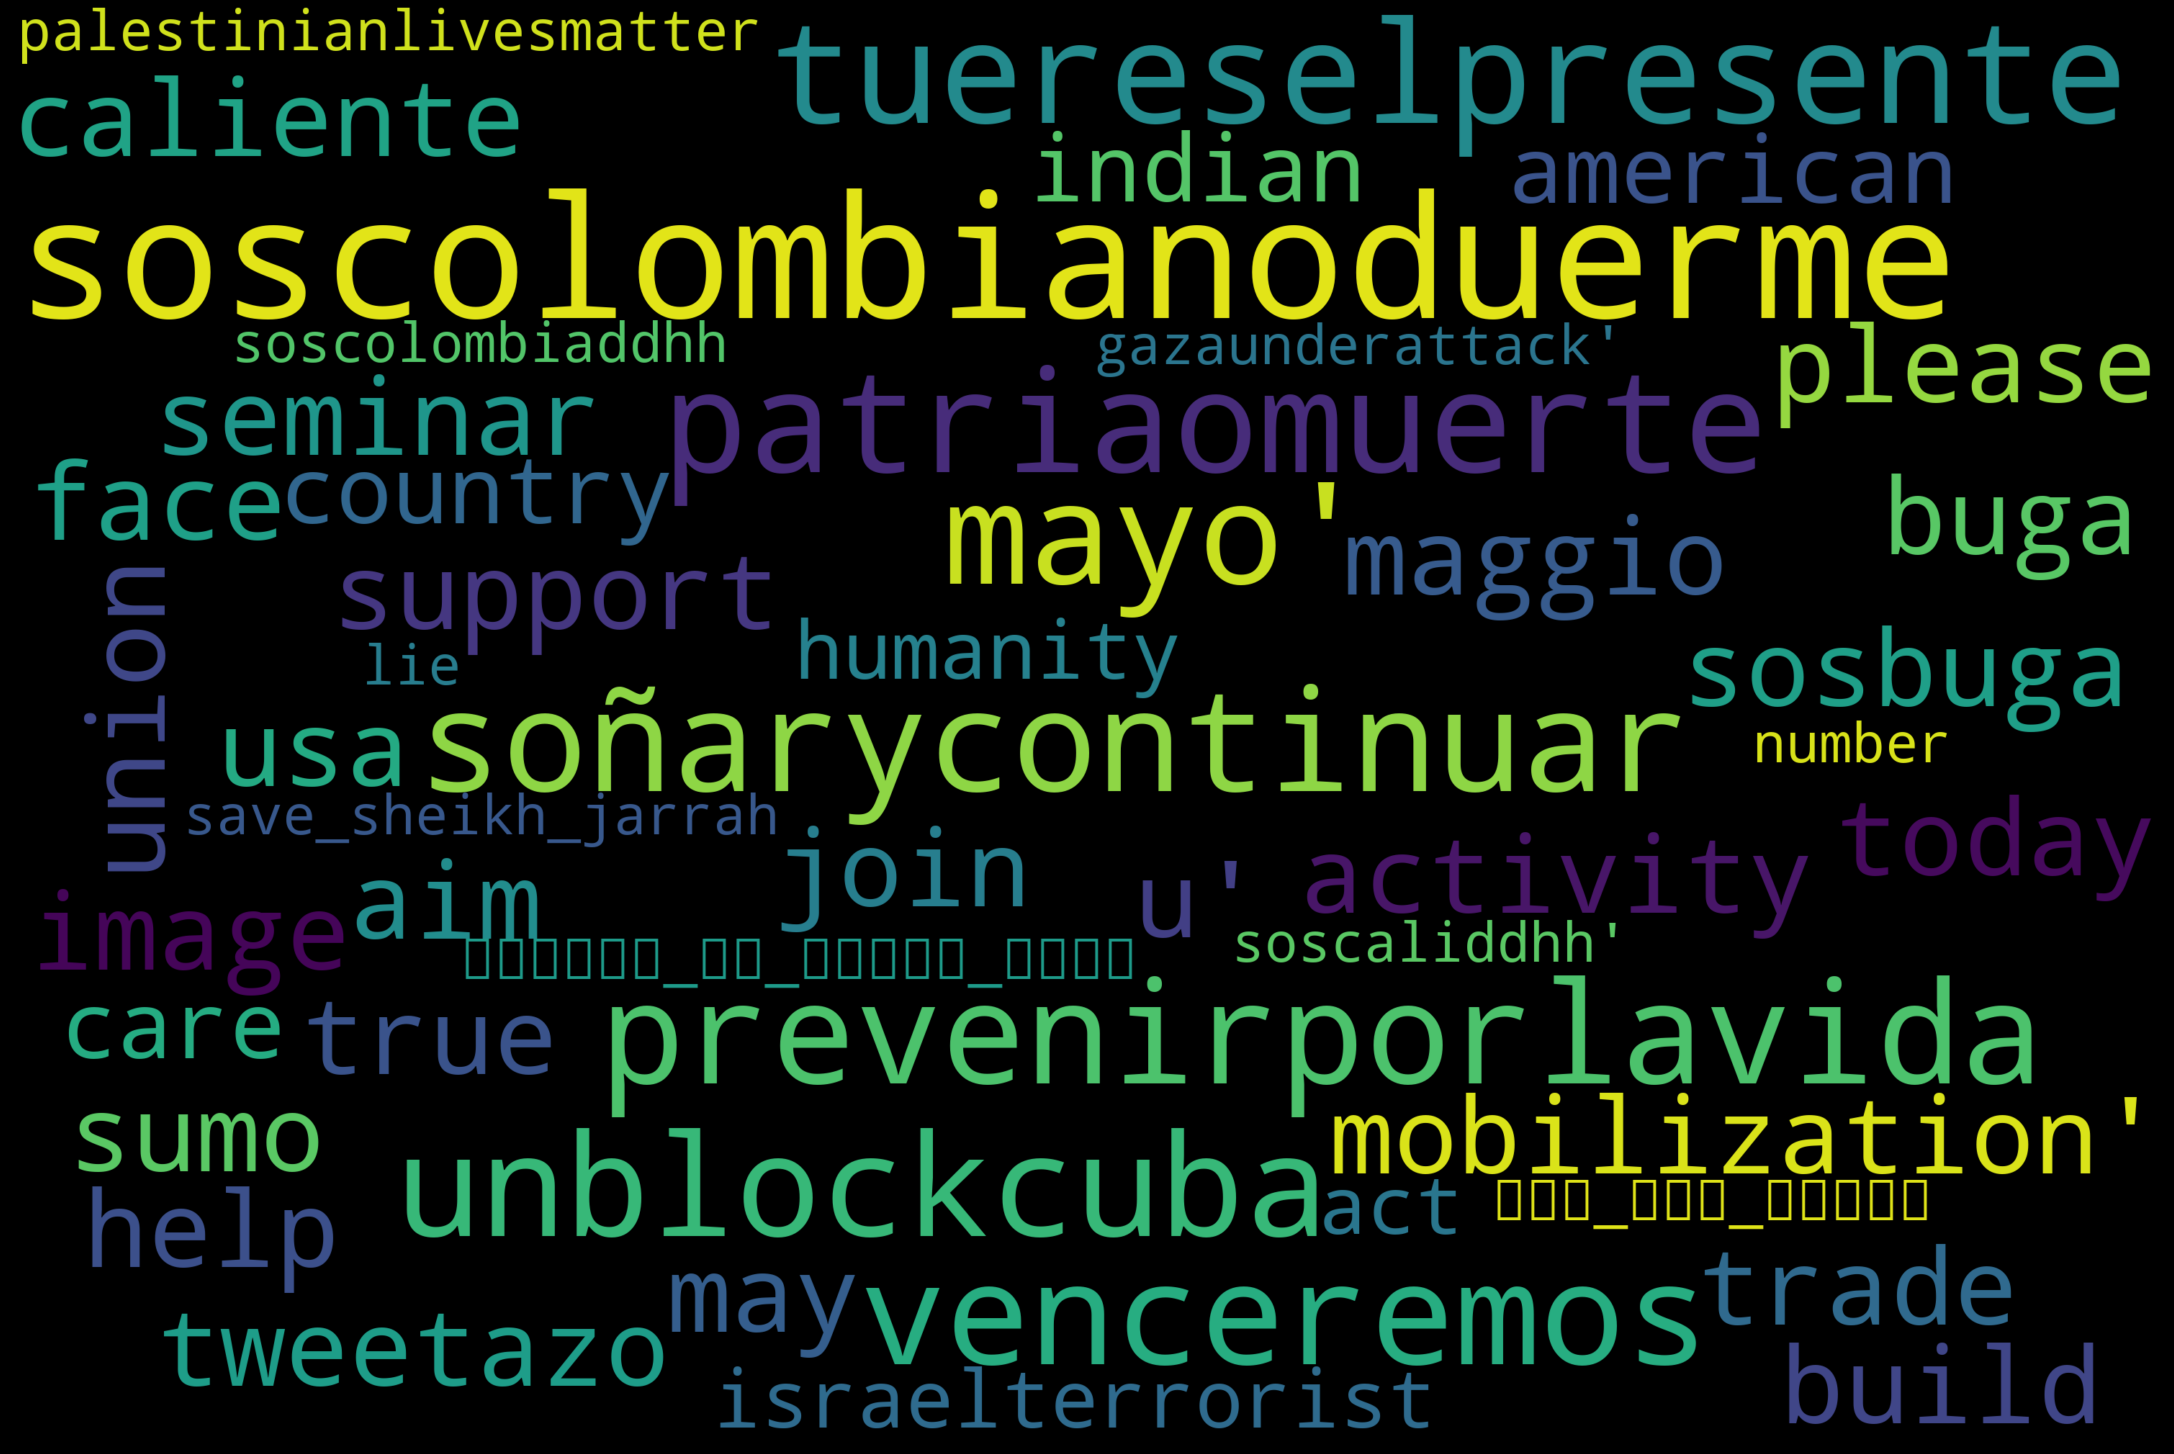

In [8]:
text = tweet.preprocessed_str.values
STOPWORDS = ["amp", "mayo"]

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
